In [428]:
import math
import random
import numpy as np
import numba
import matplotlib.pyplot as plt
import timeit 
from scipy.optimize import curve_fit
from math import factorial
from scipy.special import comb

#####################################
#1. We define everything in units of k_B so k_B is 1
#k_B = 1.381e-23 J/K
#Beta= 1/(k_B*T)

In [430]:
#Exercise 2!!!
N,m = 100, 100
U_latt = np.zeros((N,N))
Uinitial=0
Grid = np.zeros((N,N),dtype=int)
np.put(Grid,np.random.choice(range(N*N), m, replace=1),1)     #CHOOSE HOW MANY PARTICLES YOU PUT ON THE BEGIINING
epislon=-1


for i in range(N): 
    for j in range(N):
        right =j+1
        left = j-1
        up   = i-1
        down = i+1
        if Grid[i][j]==1:
            if i == 0: up =N-1
            if i == N-1: down = 0
            if j == 0: left = N-1
            if j == N-1: right = 0
            Uinitial+= (epislon)*Grid[up][j]*Grid[i][j]    
            Uinitial+= (epislon)*Grid[down][j]*Grid[i][j]
            Uinitial+= (epislon)*Grid[i][left]*Grid[i][j]
            Uinitial+= (epislon)*Grid[i][right]*Grid[i][j]

##Make the function to confirm if the energies are right

def evaluate_energy(Grid):
    return 0

def make_CoolMap(Lattice):
    cmap = plt.get_cmap("coolwarm", 2)
    # Create a plot
    plt.matshow(Lattice, cmap=cmap)
    plt.xticks(range(Lattice.shape[1]))
    plt.yticks(range(Lattice.shape[0]))
    plt.grid(visible=False)
    # Highlight  of p0 and p1
    # #plt.text(p0[1], p0[0], 'X', ha='center', va='center', fontsize=12, color='black')
    # #plt.text(p1[1], p1[0], 'X', ha='center', va='center', fontsize=12, color='black')
    plt.show()
    
#There are 2 ways:
#1.change: it can be a hole-hole, particle-particle and then nothing changes but it does when it is hole-particle
#2.use function where to know where the particles are(and have to update the data structures)

def MonteCarlo(Grid,U,N,T): 
    
    place1 = np.random.randint(0, N, size=(1, 2))
    place2 = np.random.randint(0, N, size=(1, 2)) 
    
    a,b = place1[0][0],place1[0][1] 
    c,d = place2[0][0],place2[0][1]
    
    change_place1 = Grid[a][b]
    change_place2 = Grid[c][d]
    
    first = False 
    second = False
    #Grid_try = Grid.copy()
    
    if Grid[a][b] == 1 and Grid[c][d] !=1 :
        first = True 
    if Grid[c][d] == 1 and Grid[a][b]!=1:
        second = True
    U_swap = U
    
    if first!=second: 
        Grid[a][b]= change_place2
        Grid[c][d] = change_place1
    
        right,left,up,down =b+1,b-1,a-1,a+1
        if a == 0: up =N-1
        if a == N-1: down = 0
        if b == 0: left = N-1
        if b == N-1: right = 0
        #print("BEFORE",U_swap)
        U_swap+= (epislon)*Grid[up][b]*Grid[a][b]    
        U_swap+= (epislon)*Grid[down][b]*Grid[a][b]
        U_swap+= (epislon)*Grid[a][left]*Grid[a][b]
        U_swap+= (epislon)*Grid[a][right]*Grid[a][b]
        
        right,left,up,down =d+1,d-1,c-1,c+1
        if c == 0: up =N-1
        if c == N-1: down = 0
        if d == 0: left = N-1
        if d == N-1: right = 0
        U_swap+= (epislon)*Grid[up][d]*Grid[c][d]    
        U_swap+= (epislon)*Grid[down][d]*Grid[c][d]
        U_swap+= (epislon)*Grid[c][left]*Grid[c][d]
        U_swap+= (epislon)*Grid[c][right]*Grid[c][d]
        
        #print("AFTER",U_swap)
    
    
    ####CHANGE THIS TO NOT HAVE A COPY!!!
    #print(Grid)
    move = False
    
    if U_swap-U < 0: 
        move = True
    else: ###FINISH CHANGING THIS
        probability = np.exp(-(U_swap-U)/T)
        if random.random() < probability: 
            move = True 
        else:
            move = False
            delta_U = 0
    if move == True :
        Grid[a][b]= change_place2
        Grid[c][d] = change_place1
        delta_U =U_swap-U
        #print(Grid)
        #print(delta_U)
        #make_CoolMap(Grid)
        
        
    return Grid, delta_U

####change one particle: pick a hole and change it to a particle and it from somewhere else
steps=100000 ##10_000
T = np.arange(3,0.1,-0.1)

U_list =[]

U_mean_lis =[]

for T_i in T: 
    Temp = T_i
    #Uinitial = 0
    for k in range(steps):  
        Grid, delta_U = MonteCarlo(Grid,Uinitial,N, Temp) 
        ###IT IS NOT CHANGING UNLESS WHEN IT CHANGES TEMPERATURE 
        Uinitial = Uinitial + delta_U
        #U_list.append(Uinitial)
        U_list.append(delta_U)
        #U_list.append(Uinitial/steps)
        
    U_mean_lis.append(np.mean(U_list[-200:])) ###Take the last 100 elements that should be in equilibrium
        
M_U = np.ones(len(U_mean_lis)) 
#U_mean_lis =U_mean_lis[-200:]
  
Cv_var = []
'''  
for i in range(U_mean_lis):
    U_variance = np.var(U_mean_lis[i])
    Cv_variance =U_variance/T[i]**2
    #E_var.append(E_variance)
    Cv_var.append(Cv_variance)
'''  
print(U_mean_lis, len(Cv_var), len(T))

[0.0, -0.005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005, 0.0, 0.0, 0.0, 0.0, -0.005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0 29


In [431]:
#print(U_mean_lis)

In [432]:
#boltz_mE, Z_mE, p_mE, mE_mE, Cv_gradient_mE, Cv_variance_mE, F_mE, S_mE = boltzmann(U_mean_lis,T,M_U)


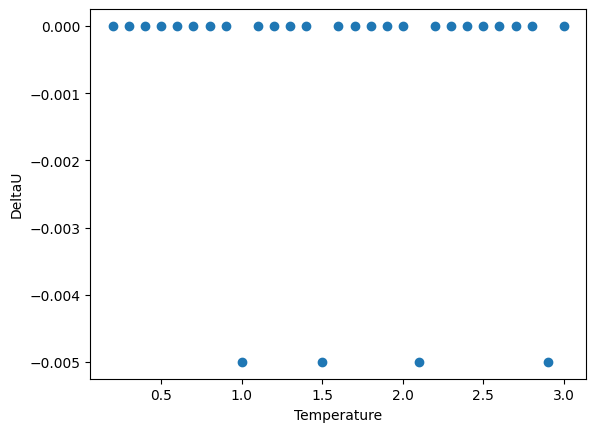

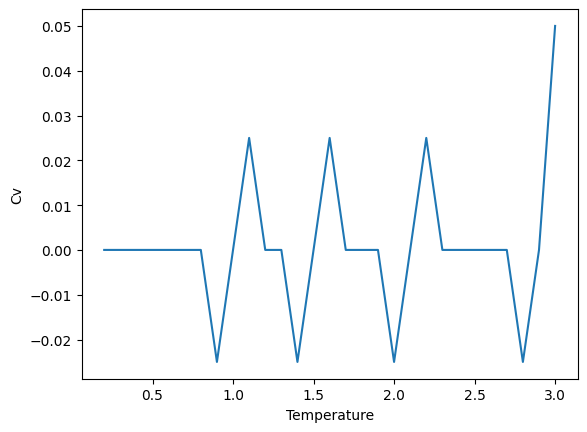

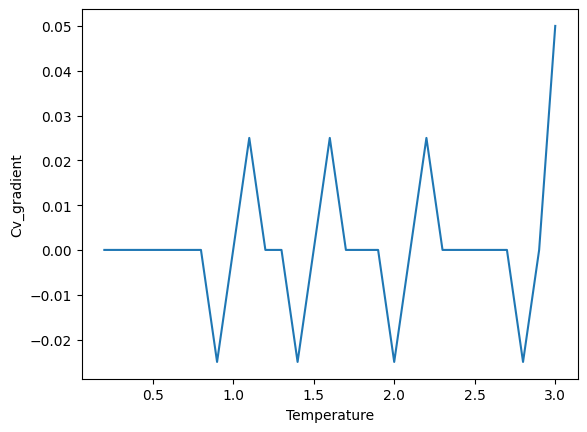

In [433]:

plt.figure()
plt.plot(T, U_mean_lis,'o')
plt.xlabel('Temperature')
plt.ylabel('DeltaU')
plt.show()
Cv_gradient = np.gradient(U_mean_lis,T)  
plt.figure()
#plt.plot(T, Cv_gradient_mE)
#plt.plot(T, Cv_variance_mE)
plt.plot(T, Cv_gradient)
plt.xlabel('Temperature')
plt.ylabel('Cv')
#plt.xlim(0,200)
plt.show()


plt.figure()
plt.plot(T, Cv_gradient)
plt.xlabel('Temperature')
plt.ylabel('Cv_gradient')
plt.show()

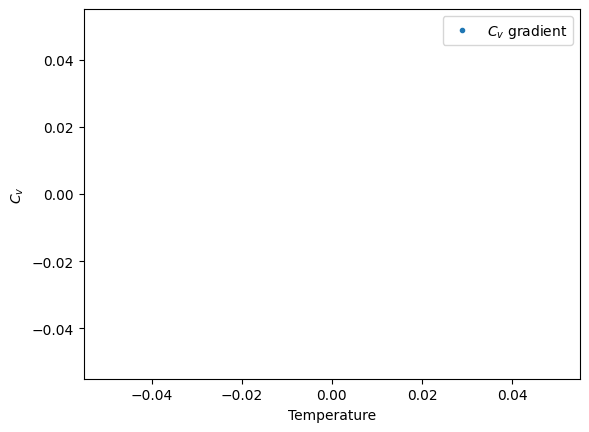

In [ ]:
'''  
#U_mean =[i/steps for i in U_list]
#Cv_gradient = np.gradient(U_mean,T)
plt.figure()
#plt.plot(T,Cv_gradient_mE,'--',T,Cv_variance_mE,'.')
#plt.plot(T, Cv_gradient,'.')
plt.plot(T, Cv_gradient_mE,'.')
#plt.plot(T, Cv_var,'.')
#plt.plot(T, Cv_variance_mE,'.')
plt.xlabel('Temperature')
plt.ylabel('$C_v$')
plt.legend(['$C_v$ gradient','$C_v$ variance'])
#plt.xlim(0,7.5)
plt.show()
'''